In [8]:
import pandas as pd
import seaborn as sns
import importlib
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
path = "../mass_spec_tsv_files/spec_guest_20250420-050520-325.tsv"
df = pd.read_csv(path, sep='\t', header=0)
df.head()

# Peters plot approach

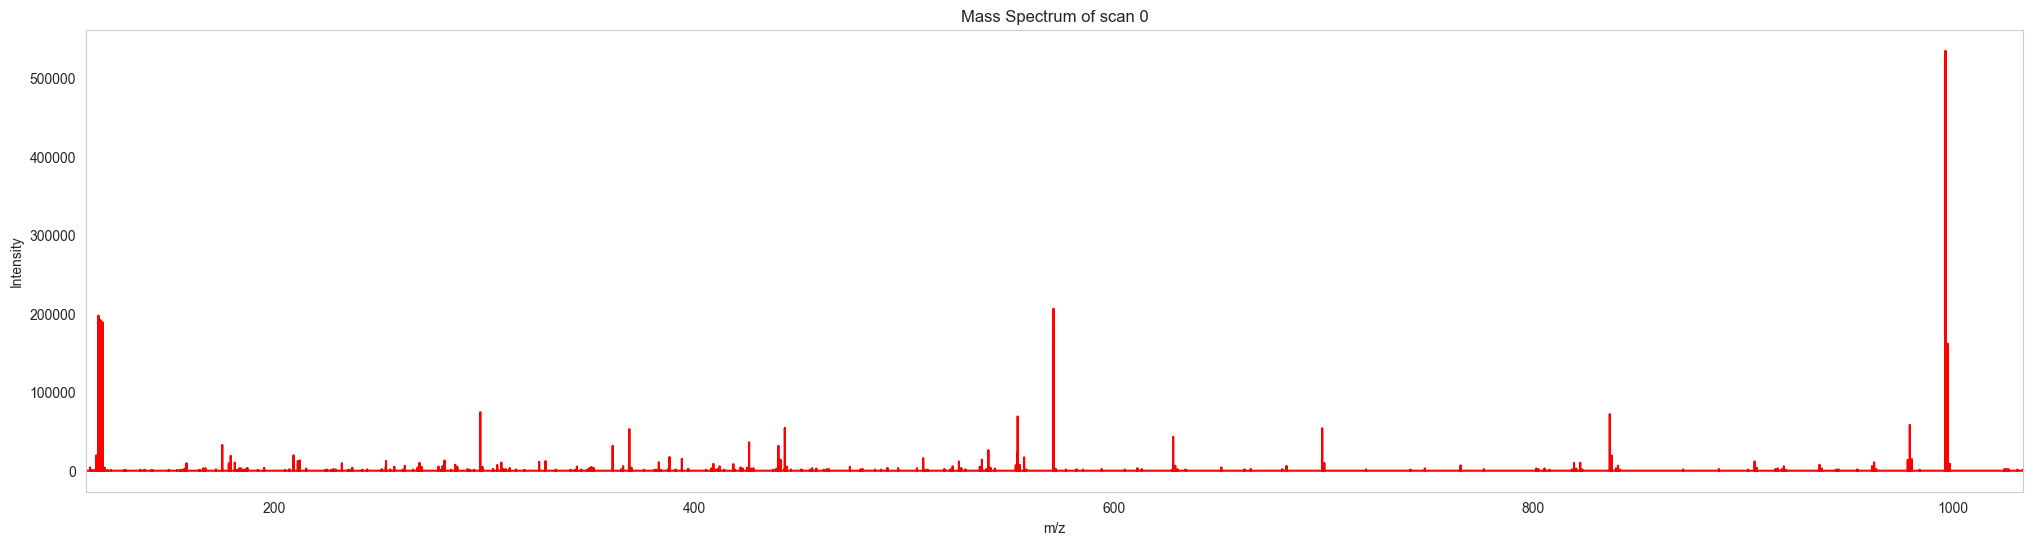

In [10]:
hp.plot_msSpectra(df["m/z"],df["intensity"])

In [13]:
importlib.reload(hp)

<module 'helpers' from 'C:\\Users\\TheSh\\Documents\\Programming_in_Python_Class\\PyCharmProjects\\expert-tandem\\helpers.py'>

# MassSpectraPlot
looks pretty and fits well into latex. <br>
dont know how good it is at identifying peaks and such in difficult situations. <br>
lets you annotate and do cool shit. <br>

In [24]:

from other_files import MassSpectraPlot as msp

In [29]:
importlib.reload(msp)

<module 'MassSpectraPlot' from 'C:\\Users\\TheSh\\Documents\\Programming_in_Python_Class\\PyCharmProjects\\expert-tandem\\MassSpectraPlot.py'>

Generate PNG mass spectra plot (output.png) from            m/z   intensity
0     110.0713  29422.7891
1     112.0868   4282.5659
2     113.0709   1195.4149
3     114.2358    821.0837
4     115.0865   9551.1641
..         ...         ...
296  1024.4329   2124.4158
297  1025.4358   2530.6292
298  1026.4417   2033.2756
299  1030.7253   1268.2054
300  1033.4890   1368.9159

[301 rows x 2 columns].[xy/txt]
move labels to left
change 1453.9270907090026 469.6751222050658
change 1424.005830866483 469.6751222050658
change 1394.0845710239632 469.6751222050658
change 1364.1633111814435 469.6751222050658
change 1334.2420513389238 469.6751222050658
change 1304.3207914964041 469.6751222050658
change 1274.3995316538844 469.6751222050658
change 1244.4782718113647 469.6751222050658
change 1214.557011968845 469.6751222050658
change 1184.6357521263253 469.6751222050658
change 1154.7144922838056 469.6751222050658
change 1124.793232441286 469.6751222050658
change 1094.8719725987662 469.6751222050658
chang

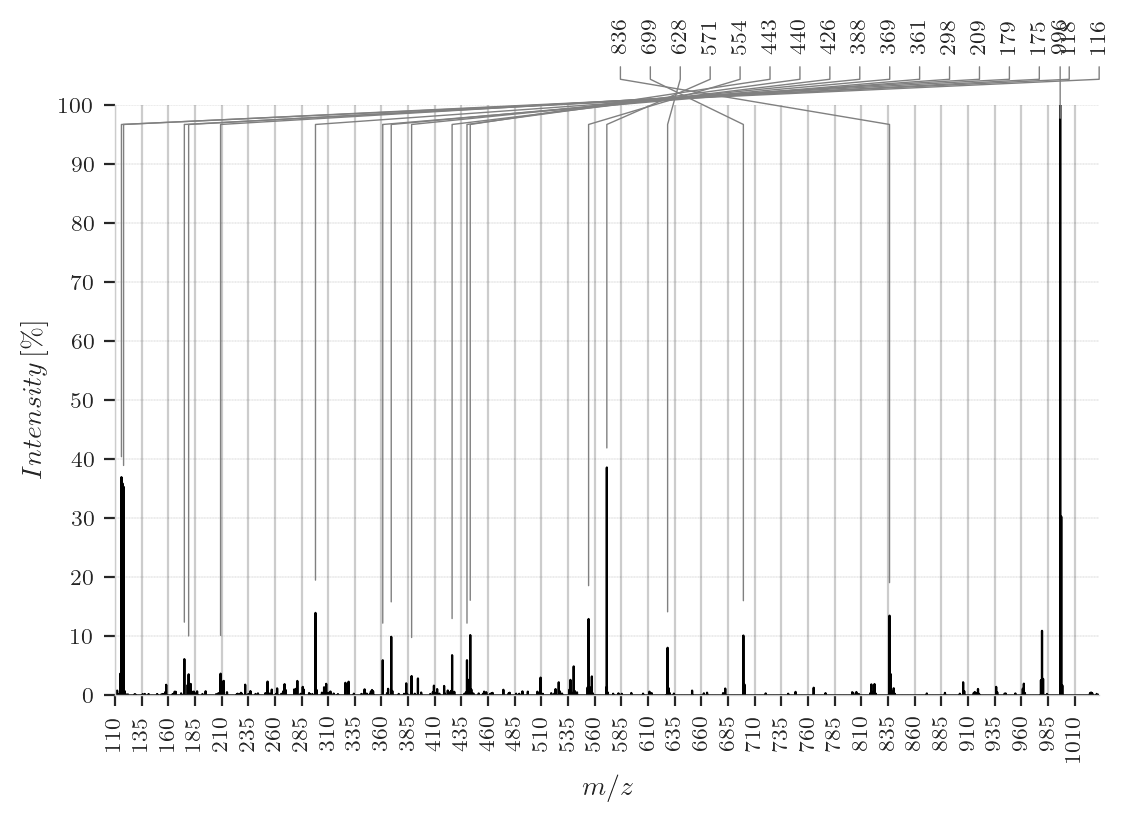

In [32]:
#msp.generate_massspectra_plot_automatic_labels(df,None,"output")
msp.generate_massspectra_plot_automatic_labels(df,peak_list,"output")

## SciPy find peaks

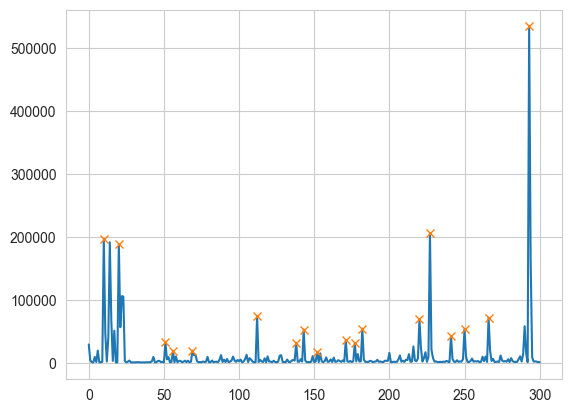

In [11]:

import matplotlib.pyplot as plt
from scipy.signal import find_peaks


x = df["intensity"]

h = 100
dist = 5
prom = 15000

peaks, _ = find_peaks(x,
                      height=h,
                      distance=dist,
                      prominence=prom
                      )
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

<Axes: xlabel='m/z', ylabel='intensity'>

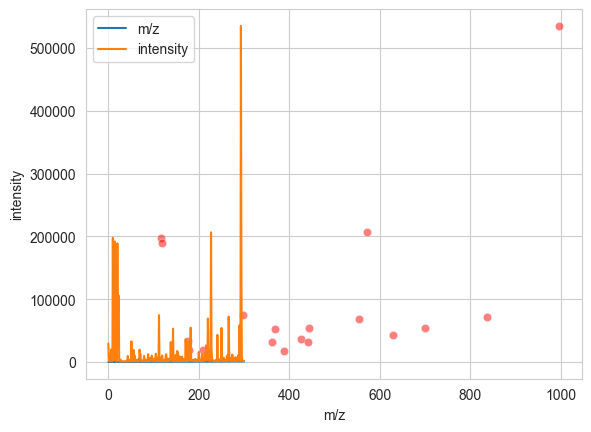

In [12]:
df.plot()
sns.scatterplot(data = df.iloc[peaks].reset_index(),
                x = "m/z",
                y = "intensity",
                color = "red", alpha = 0.5)

<Axes: xlabel='m/z', ylabel='intensity'>

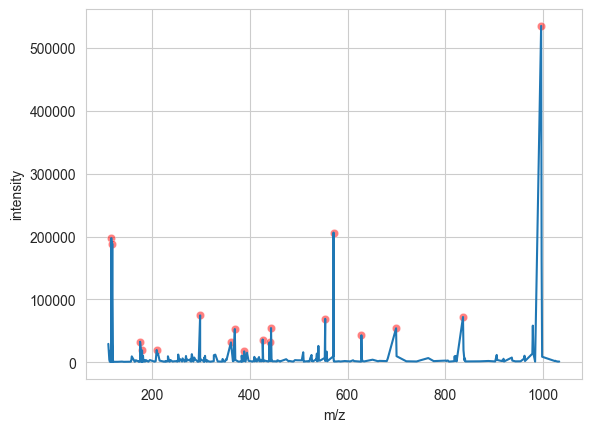

In [22]:
plt.plot(df["m/z"],df["intensity"])
sns.scatterplot(data = df.iloc[peaks].reset_index(),
                x = "m/z",
                y = "intensity",
                color = "red", alpha = 0.5)

In [18]:
len(df["m/z"])

301

In [26]:
peak_list = df.iloc[peaks].reset_index()

In [7]:
peak_list["m/z"]

0     116.1281
1     118.1348
2     175.1187
3     179.1486
4     209.1030
5     298.0965
6     361.1824
7     369.1334
8     388.2525
9     426.2089
10    440.1704
11    443.2355
12    554.2130
13    571.3187
14    628.3151
15    699.3516
16    836.4102
17    996.4399
Name: m/z, dtype: float64

## peak utils find peaks

In [4]:
from peakutils import indexes

<Axes: xlabel='m/z', ylabel='intensity'>

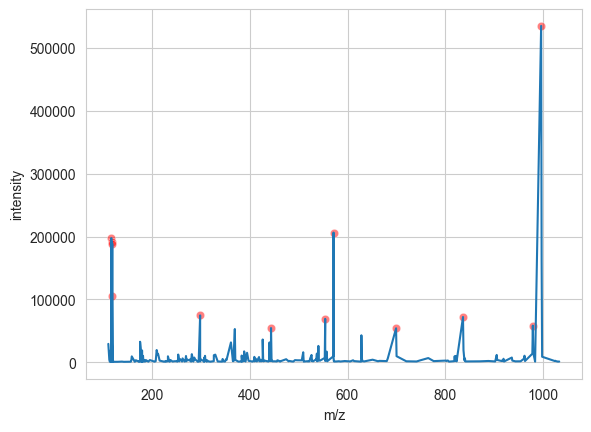

In [10]:
mdist = 1
thres_ = 0.1
p1 = indexes(df["intensity"],
             min_dist=mdist,
             thres=thres_
             )
p1

plt.plot(df["m/z"],df["intensity"])
sns.scatterplot(data = df.iloc[p1],
                x = "m/z",
                y = "intensity",
                color = "red", alpha = 0.5)

## Creating Amino Acids csv

In [12]:
import pandas as pd

In [61]:
name_list = ["full","letter","short","comp","mono mass","avg mass"]
df = pd.read_csv("../other_files/exact_aa.csv", sep='\t', names = name_list)
# df = df.drop([0,1])
# df = df.reset_index()
# df = df.drop(columns = ["index"])

In [62]:
df

,full,letter,short,comp,mono mass,avg mass
0,glycine,G,GLY,C2H3NO,57.021464,57.05132
1,alanine,A,ALA,C3H5NO,71.037114,71.07790
2,serine,S,SER,C3H5NO2,87.032028,87.07730
3,proline,P,PRO,C5H7NO,97.052764,97.11518
4,valine,V,VAL,C5H9NO,99.068414,99.13106
5,threonine,T,THR,C4H7NO2,101.047679,101.10388
6,cysteine,C,CYS,C3H5NOS,103.009185,103.14290
7,leucine,L,LEU,C6H11NO,113.084064,113.15764
8,isoleucine,I,ILE,C6H11NO,113.084064,113.15764
9,asparagine,N,ASN,C4H6N2O2,114.042927,114.10264


In [33]:
# df["name"] = None
# df["letter"] = None
# n = 0
# l = 0
# for i in range(len(df)):
#     if i % 4 == 0:
#         df.loc[n, "name"] = df["Amino acid"].iloc[i]
#         #df["name"].iloc[n] = df["Amino acid"].iloc[i]
#         n += 1
#     if i % 4 == 2:
#         df.loc[l, "letter"] = df["Amino acid"].iloc[i]
#         #df["letter"].iloc[l] = df["Amino acid"].iloc[i]
#         l += 1
#
# df.drop(columns=["Amino acid"] , inplace=True)
# df = df.dropna()
# print(len(df))
# df.head()

In [34]:
#df = df.drop(columns=["short"],axis=1)

In [59]:
#df["weight"] = df["weight"].transform(lambda x : x.replace("Da", ""))


In [63]:
df.to_csv("data/amino_acids_with_weight.csv", index=False)